In [40]:
import sys  
sys.path.insert(0, '../../src/')
import matplotlib.pyplot as plt

import featureExtraction as fe
import numpy as np
import pandas as pd

import metrics as mt


In [30]:
WINDOW_SIZE = 256
OVERLAP_FACTOR = 0.5

fe_dataset = fe.FeatureExtractor('ours', WINDOW_SIZE, OVERLAP_FACTOR)
fe_dataset.extract_features()

Loading processed dataset with Window_size=256, Overlap=0.5 and name=ours...
Please wait, this loading could last some minutes...
../data/Window256Overlap0.5/labels.txt - loaded succesfully
../data/Window256Overlap0.5/users.txt - loaded succesfully
../data/Window256Overlap0.5/train.txt - loaded succesfully
../data/Window256Overlap0.5/val.txt - loaded succesfully
../data/Window256Overlap0.5/test.txt - loaded succesfully
../data/Window256Overlap0.5/sensors(145502, 256, 9).txt - loaded succesfully
Extracting features...


100%|██████████| 145502/145502 [00:49<00:00, 2914.34it/s]


Resultant features shape: (145502, 99)


In [31]:
def column_names():
    names = []
    for sensor in ["acc","mag","gyro"]:
        for axis in ["x","y","z"]:
            for feature in ["mean","median","stds","vars","mins","max","mean-crossings","mean-mags","energy","entropy","zero-crossing"]:
                names.append(sensor+"_"+axis+"_"+feature)
    return names

feature_names = column_names()
df = pd.DataFrame(fe_dataset.features.copy(),columns = feature_names)
df.insert(len(feature_names), "label", fe_dataset.labels, True)

In [32]:
train = df.iloc[fe_dataset.idx_train]
test = df.iloc[fe_dataset.idx_test]


In [37]:
train

,acc_x_mean,acc_x_median,acc_x_stds,acc_x_vars,acc_x_mins,acc_x_max,acc_x_mean-crossings,acc_x_mean-mags,acc_x_energy,acc_x_entropy,...,gyro_z_stds,gyro_z_vars,gyro_z_mins,gyro_z_max,gyro_z_mean-crossings,gyro_z_mean-mags,gyro_z_energy,gyro_z_entropy,gyro_z_zero-crossing,label
0,-0.180817,-0.198762,0.580461,0.336935,-1.508023,2.039273,0.001108,6.980603,94.625173,-4110.563366,...,0.055863,0.003121,-0.146484,0.315308,0.000075,0.640513,1.189994,-13.230459,56.0,Car
2,-0.367344,-0.429741,0.818259,0.669548,-2.280967,1.414112,0.000180,6.446222,205.949414,-4233.518265,...,0.104682,0.010958,-0.074051,0.318497,0.000006,0.681251,7.202889,-167.826431,28.0,Car
3,0.127244,0.209179,0.708962,0.502627,-1.756731,1.693928,0.006823,7.551907,132.817461,-4685.713086,...,0.112827,0.012730,-0.149155,0.318497,-0.001092,0.860465,4.312460,-163.808459,58.0,Car
4,0.289275,0.298826,0.509709,0.259803,-1.002874,1.693928,-0.002106,6.522040,87.931693,-3708.391787,...,0.049049,0.002406,-0.149155,0.141129,0.000163,0.565559,0.617385,27.516432,92.0,Car
5,0.114582,0.133537,0.669182,0.447805,-2.201055,1.892092,-0.002868,9.033577,117.999032,-5538.204752,...,0.082460,0.006800,-0.327042,0.585876,-0.000238,1.039417,1.740803,-85.084254,83.0,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143164,-0.091342,-0.082061,0.678231,0.459997,-2.297745,2.315475,0.003603,8.911696,119.895092,-5511.806927,...,0.045165,0.002040,-0.157700,0.168808,-0.000278,0.483491,0.523820,39.062761,139.0,Car
143167,-0.166019,-0.110688,0.547347,0.299588,-1.682103,1.263984,-0.001402,7.176552,83.750610,-4070.842966,...,0.039898,0.001592,-0.130539,0.102768,0.000052,0.440287,0.409059,48.146705,138.0,Car
143168,-0.123727,-0.068628,0.573093,0.328435,-2.163223,1.263984,-0.000489,7.730499,87.998405,-4468.844392,...,0.034039,0.001159,-0.130539,0.128860,0.000119,0.410225,0.297705,63.202019,150.0,Car
143170,-0.040920,-0.010757,0.671561,0.450994,-1.948857,2.277565,-0.000098,8.509074,115.883136,-5246.729284,...,0.038035,0.001447,-0.176346,0.144836,-0.000027,0.449327,0.370967,55.449308,148.0,Car


In [34]:
fe_dataset.standarization()


Applying z-score normalization...
Done.


In [35]:
df_normalized = pd.DataFrame(fe_dataset.features,columns = feature_names)
df_normalized.insert(len(feature_names), "label", fe_dataset.labels, True)

train_norm = df_normalized.iloc[fe_dataset.idx_train]
test_norm = df_normalized.iloc[fe_dataset.idx_test]


In [36]:
train_norm

,acc_x_mean,acc_x_median,acc_x_stds,acc_x_vars,acc_x_mins,acc_x_max,acc_x_mean-crossings,acc_x_mean-mags,acc_x_energy,acc_x_entropy,...,gyro_z_stds,gyro_z_vars,gyro_z_mins,gyro_z_max,gyro_z_mean-crossings,gyro_z_mean-mags,gyro_z_energy,gyro_z_entropy,gyro_z_zero-crossing,label
0,-0.209486,-0.198227,-0.193600,-0.201374,0.209513,-0.120872,0.091756,-0.081118,-0.189542,0.189606,...,-0.372764,-0.248080,0.366995,-0.202942,0.022597,-0.300564,-0.250508,0.354604,0.540921,Car
2,-0.412196,-0.427284,-0.062480,-0.183840,0.036929,-0.221984,0.014996,-0.116545,-0.171755,0.183351,...,-0.265220,-0.240413,0.433223,-0.200322,0.000516,-0.287417,-0.228227,0.301654,-0.234290,Car
3,0.125304,0.206321,-0.122746,-0.192640,0.153981,-0.176727,0.564121,-0.043244,-0.183440,0.160346,...,-0.247275,-0.238680,0.364553,-0.200322,-0.351410,-0.229580,-0.238938,0.303030,0.596293,Car
4,0.301392,0.295223,-0.232612,-0.205440,0.322303,-0.176727,-0.173969,-0.111519,-0.190611,0.210065,...,-0.387776,-0.248780,0.364553,-0.346072,0.050696,-0.324753,-0.252630,0.368560,1.537621,Car
5,0.111543,0.131309,-0.144680,-0.195530,0.054771,-0.144677,-0.236893,0.054984,-0.185807,0.116977,...,-0.314173,-0.244482,0.201905,0.019394,-0.077781,-0.171828,-0.248467,0.329994,1.288446,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143164,-0.112248,-0.082497,-0.139691,-0.194887,0.033183,-0.076200,0.297958,0.046904,-0.185504,0.118320,...,-0.396333,-0.249138,0.356740,-0.323327,-0.090470,-0.351239,-0.252977,0.372515,2.838868,Car
143167,-0.193404,-0.110885,-0.211859,-0.203343,0.170644,-0.246265,-0.115702,-0.068128,-0.191279,0.191626,...,-0.407936,-0.249576,0.381574,-0.377594,0.015237,-0.365182,-0.253402,0.375626,2.811182,Car
143168,-0.147443,-0.069175,-0.197663,-0.201822,0.063219,-0.246265,-0.040307,-0.031404,-0.190600,0.171379,...,-0.420844,-0.250000,0.381574,-0.356153,0.036627,-0.374883,-0.253815,0.380783,3.143416,Car
143170,-0.057451,-0.011785,-0.143368,-0.195361,0.111083,-0.082331,-0.007930,0.020212,-0.186145,0.131805,...,-0.412040,-0.249718,0.339691,-0.343025,-0.010198,-0.362264,-0.253543,0.378127,3.088043,Car


In [38]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from keras.utils import to_categorical

feature_names = list(df.columns)
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df.label.copy())
class_names = label_encoder.classes_

### Random Forest on non-normalized data


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train = train.drop(columns='label')
y_train = train['label']
X_test = test.drop(columns='label')
y_test = test['label']

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict on the test data and evaluate the model
y_pred = rf.predict(X_test)


              precision    recall  f1-score   support

        Bike       0.65      0.54      0.59       555
         Bus       0.81      0.88      0.84      3866
         Car       0.96      0.90      0.93      4248
       Metro       0.91      0.76      0.83      4560
        Moto       0.78      0.87      0.82       498
         Run       0.96      0.98      0.97       713
  Stationary       0.70      0.88      0.78       965
       Train       0.06      0.54      0.11        93
        Tram       0.91      0.82      0.87      2930
        Walk       0.86      0.85      0.86      2736
      e-Bike       0.30      0.95      0.45        22
   e-Scooter       0.77      0.83      0.80       636

    accuracy                           0.84     21822
   macro avg       0.72      0.82      0.74     21822
weighted avg       0.87      0.84      0.85     21822



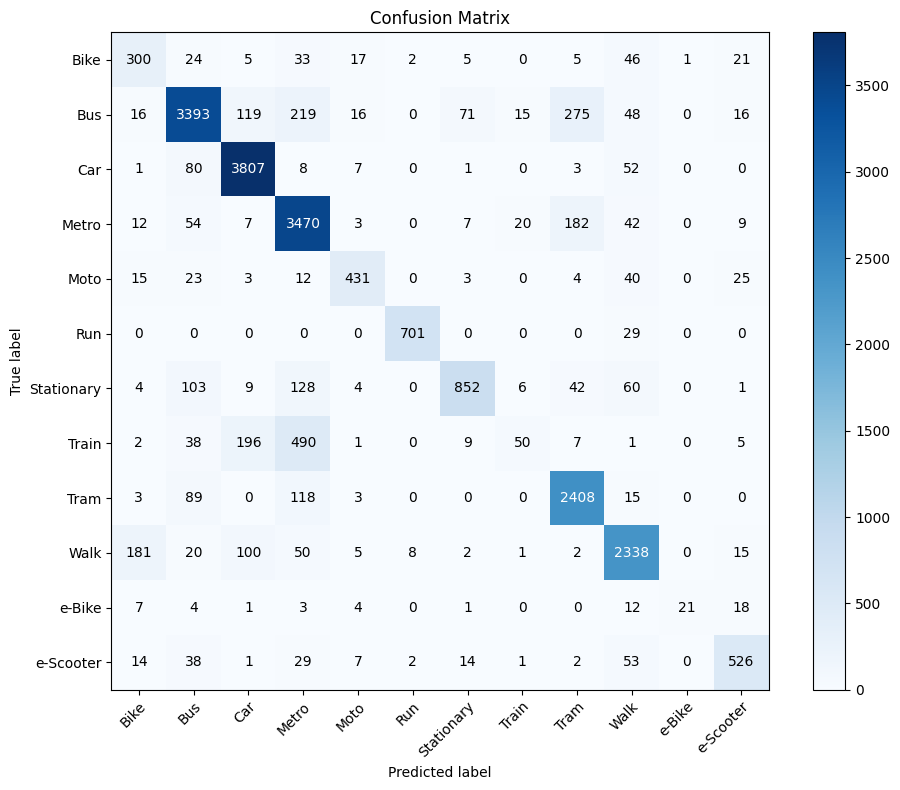

In [41]:
print(classification_report(y_pred, y_test))
mt.plot_confusion_matrix(y_test,y_pred)

### Random Forest on normalized data


In [42]:
X_train_norm = train_norm.drop(columns='label')
y_train_norm = train_norm['label']
X_test_norm = test_norm.drop(columns='label')
y_test_norm = test_norm['label']

rf_norm = RandomForestClassifier()
rf_norm.fit(X_train_norm, y_train_norm)

# Predict on the test_norm data and evaluate the model
y_pred_norm = rf_norm.predict(X_test_norm)


              precision    recall  f1-score   support

        Bike       0.65      0.58      0.61       519
         Bus       0.82      0.88      0.85      3886
         Car       0.96      0.90      0.93      4251
       Metro       0.91      0.76      0.83      4550
        Moto       0.79      0.86      0.82       512
         Run       0.96      0.98      0.97       712
  Stationary       0.70      0.88      0.78       969
       Train       0.06      0.60      0.11        81
        Tram       0.92      0.82      0.87      2933
        Walk       0.87      0.86      0.86      2747
      e-Bike       0.31      1.00      0.47        22
   e-Scooter       0.77      0.82      0.79       640

    accuracy                           0.84     21822
   macro avg       0.73      0.83      0.74     21822
weighted avg       0.88      0.84      0.85     21822



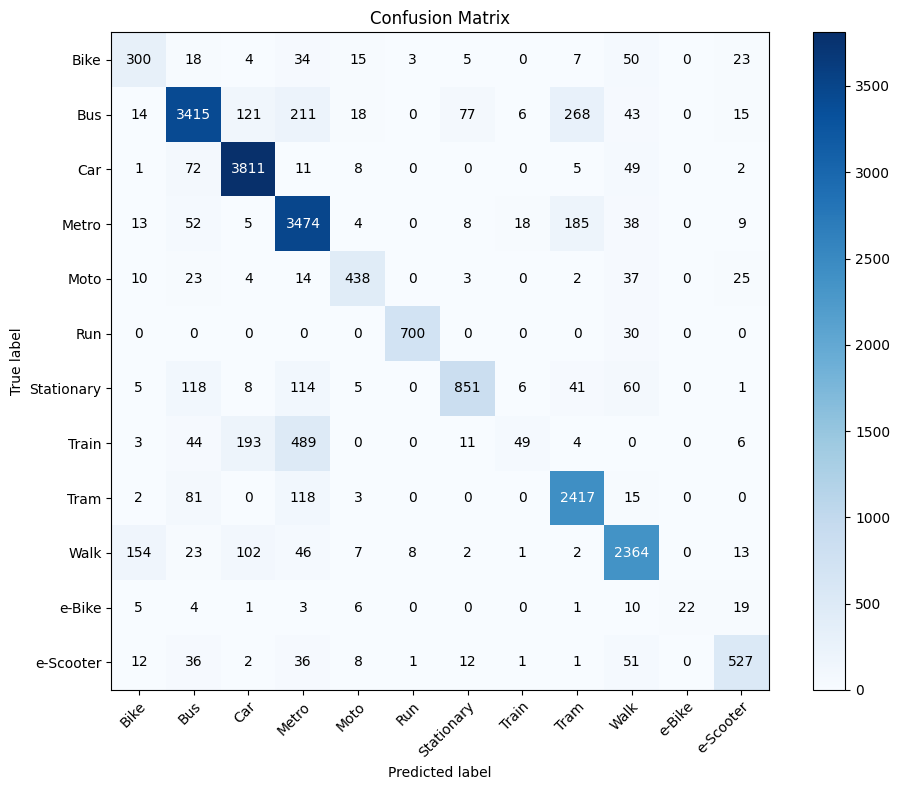

In [43]:

print(classification_report(y_pred_norm, y_test_norm))
mt.plot_confusion_matrix(y_test_norm,y_pred_norm)